In [1]:
%matplotlib inline
#import modules and dependencies
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import glob
import sys
import numpy as np

In [2]:
#bring in baby name data from SSN text files for 51 States (DC is a sep file)
#create a dataframe
name_df = pd.DataFrame()

#open, read all text files downloaded from SSN website and name the column labels
for files in glob.glob('../columbia_group_project/SSN_data/*.txt'):
    comb_data = pd.read_csv(files,names=['state', 'gender', 'year', 'name', 'count'])
#concatenate text files in the dataframe
    name_df = pd.concat([name_df,comb_data],axis=0,ignore_index=True)
name_df.head()

,state,gender,year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [3]:
#bring in data for State classification (R/D) by election year - source wikipedia 
#write data into a dataframe 
States_df = pd.DataFrame()
States_df = pd.read_csv('data/blueRedStates.csv',encoding='ISO-8859-1')
States_df.head(10)

,state_Name,state,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,R/D No change
0,Alabama,AL,R,D,R,R,R,R,R,R,R,R,R,R,True
1,Alaska,AK,R,R,R,R,R,R,R,R,R,R,R,R,True
2,Arizona,AZ,R,R,R,R,R,R,D,R,R,R,R,R,True
3,Arkansas,AR,R,D,R,R,R,D,D,R,R,R,R,R,True
4,California,CA,R,R,R,R,R,D,D,D,D,D,D,D,True
5,Colorado,CO,R,R,R,R,R,D,R,R,R,D,D,D,True
6,Connecticut,CT,R,R,R,R,R,D,D,D,D,D,D,D,True
7,Delaware,DE,R,D,R,R,R,D,D,D,D,D,D,D,True
8,District of Columbia,DC,D,D,D,D,D,D,D,D,D,D,D,D,True
9,Florida,FL,R,D,R,R,R,R,D,R,R,D,D,R,False


# The group decided to base our analysis on 2012 (Obama-Romney) vs. 2016 (Trump-H.Clinton) election years

# 2012 Election Year Analysis

In [4]:
#create a DF for 2012 only
Election2012=name_df.loc[(name_df['year']==2012)].reset_index(drop=True)
Election2012.head() #verify df

,state,gender,year,name,count
0,AK,F,2012,Emma,57
1,AK,F,2012,Sophia,56
2,AK,F,2012,Olivia,49
3,AK,F,2012,Abigail,38
4,AK,F,2012,Ava,32


In [5]:
#create a list of states groupedby red(R) and blue(D) for 2012 eleciton year
# set up lists and append state names based on the R or D vote
red2012=[]
red2012=States_df.loc[States_df["2012"]=='R','state'].tolist()
#red2012 #verify output

#create a names df for 2012 red states
red2012names=Election2012[Election2012['state'].isin(red2012)]
#red2012names #.head() #verify output

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topRedNames2012=red2012names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topRedNames2012_sorted=topRedNames2012.groupby('gender').head(10)
topRedNames2012_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2012,William,7603
1,M,2012,Mason,7280
2,M,2012,Jacob,6934
3,M,2012,Noah,6355
4,M,2012,Ethan,6323
5,M,2012,Liam,6022
6,M,2012,Elijah,5999
7,M,2012,Aiden,5799
8,M,2012,Jayden,5790
9,M,2012,James,5589


In [6]:
#create a list of states groupedby red(R) and blue(D) for 2012 eleciton year
# set up lists and append state names based on the R or D vote
blue2012=[]
blue2012=States_df.loc[States_df["2012"]=='D','state'].tolist()
#blue2012 #verify output

#create a names df for 2012 red states
blue2012names=Election2012[Election2012['state'].isin(blue2012)]
#red2012names #.head() #verify output

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topBlueNames2012=blue2012names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topBlueNames2012_sorted=topBlueNames2012.groupby('gender').head(10)
topBlueNames2012_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2012,Jacob,12140
1,M,2012,Mason,11689
2,M,2012,Ethan,11349
3,M,2012,Noah,10998
4,M,2012,Liam,10782
5,M,2012,Michael,10600
6,M,2012,Jayden,10337
7,M,2012,Alexander,10326
8,M,2012,Daniel,9543
9,M,2012,Matthew,9435


# Create US Map of Red vs. Blue States for 2012 Election

In [7]:
#load GeoDataFrame
usa=gpd.read_file('US_Maps_data/states_21basic/states.shp')
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


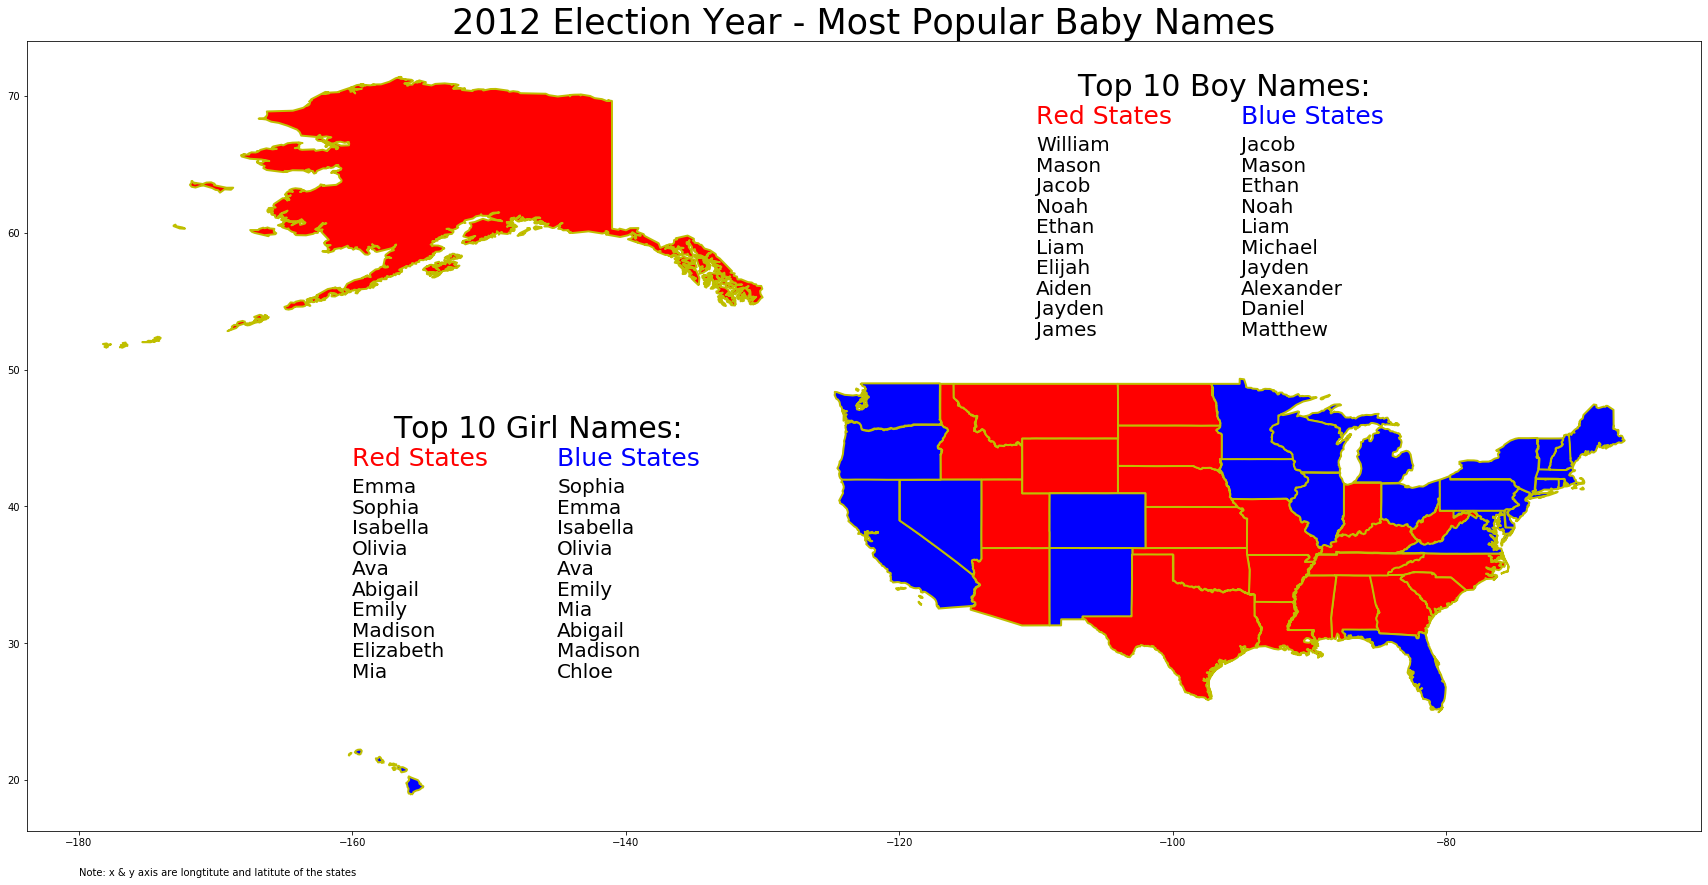

In [8]:
#create a US map by R/D affiliation and show top 10 names
def state_plotter(states, us_map=True):
    fig, ax=plt.subplots(figsize=(30,30))
    if us_map: 
        usa[0:51].plot(ax=ax, alpha=0.3) 
        for n in red2012:
                usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='r', edgecolor='y', linewidth=2)
        for n in blue2012:
                usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='b', edgecolor='y', linewidth=2)
    elif us_map==False:
        for n in states:
            usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='g', edgecolor='y', linewidth=2)
    
state_plotter('red2012','blue2012')

# Give our map a tile and footer
plt.title("2012 Election Year - Most Popular Baby Names", fontsize=35)
plt.text(-180,13,"Note: x & y axis are longtitute and latitute of the states")

# Incorporate a titles and labels for top names
plt.text(-157,45, "Top 10 Girl Names:", fontsize=30)
plt.text(-160,43, "Red States", fontsize=25,color='red')
plt.text(-145,43, "Blue States", fontsize=25,color='blue')
plt.text(-107,70, "Top 10 Boy Names:", fontsize=30)
plt.text(-110,68, "Red States", fontsize=25,color='red')
plt.text(-95,68, "Blue States", fontsize=25,color='blue')

# to populate girls names
#create lists for names to be loded in the text
y2012BlueGirls=topBlueNames2012_sorted.loc[topBlueNames2012_sorted['gender']=='F','name'].tolist()
y2012RedGirls=topRedNames2012_sorted.loc[topRedNames2012_sorted['gender']=='F','name'].tolist()
#set coordiants for girls lists
yGirls=41
x2012RedGirls=-160
x2012BlueGirls=-145
#create a loop to write the names to the text on the map
for name in y2012RedGirls:
    plt.text(x2012RedGirls, yGirls,name,fontsize=20)
    yGirls=yGirls-1.5
yGirls=41   #reset yGirls for blue loop 
for name in y2012BlueGirls:
    plt.text(x2012BlueGirls, yGirls,name,fontsize=20)
    yGirls=yGirls-1.5
    
# to populate boys names
#create lists for names bo be loaded in the text
y2012BlueBoys=topBlueNames2012_sorted.loc[topBlueNames2012_sorted['gender']=='M','name'].tolist()
y2012RedBoys=topRedNames2012_sorted.loc[topRedNames2012_sorted['gender']=='M','name'].tolist()
#set coordiants for boys lists
yBoys=66
x2012RedBoys=-110
x2012BlueBoys=-95
#create a loop to write the names to the text on the map
for name in y2012RedBoys:
    plt.text(x2012RedBoys, yBoys,name,fontsize=20)
    yBoys=yBoys-1.5
yBoys=66   #reset yBoys for blue loop 
for name in y2012BlueBoys:
    plt.text(x2012BlueBoys, yBoys,name,fontsize=20)
    yBoys=yBoys-1.5
    
# Save and show the Figure
plt.savefig("output/2012Top10.png", bbox_inches="tight")
plt.show()

# 2016 Election Year Analysis

In [9]:
#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
Election2016=name_df.loc[(name_df['year']==2016)].reset_index(drop=True)
Election2016.head() #verify df


,state,gender,year,name,count
0,AK,F,2016,Emma,47
1,AK,F,2016,Olivia,46
2,AK,F,2016,Amelia,35
3,AK,F,2016,Charlotte,34
4,AK,F,2016,Sophia,33


In [10]:
#create a list of states groupedby red(R) and blue(D) for 2016 eleciton year
# set up lists and append state names based on the R or D vote
red2016=[]
red2016=States_df.loc[States_df["2016"]=='R','state'].tolist()
#red2016 # to verify generation of the list

#create a names df for 2016 red states
red2016names=Election2016[Election2016['state'].isin(red2016)]
#red2016names #.head() #to verify generation of the df

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topRedNames2016=red2016names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topRedNames2016_sorted=topRedNames2016.groupby('gender').head(10)
topRedNames2016_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2016,Noah,10546
1,M,2016,Liam,10212
2,M,2016,William,9504
3,M,2016,Mason,8927
4,M,2016,Elijah,8750
5,M,2016,James,8487
6,M,2016,Benjamin,7728
7,M,2016,Michael,7578
8,M,2016,Jacob,7488
9,M,2016,Oliver,7397


In [11]:
#create a list of states groupedby red(R) and blue(D) for 2016 eleciton year
# set up lists and append state names based on the R or D vote
blue2016=[]
blue2016=States_df.loc[States_df["2016"]=='D','state'].tolist()
#blue2016 #to verify generation of the list

#create a names df for 2016 red states
blue2016names=Election2016[Election2016['state'].isin(blue2016)]
#blue2016names #.head() # to verify generation of the DF

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topBlueNames2016=blue2016names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topBlueNames2016_sorted=topBlueNames2016.groupby('gender').head(10)
topBlueNames2016_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2016,Noah,8571
1,M,2016,Liam,8006
2,M,2016,Jacob,7022
3,M,2016,Benjamin,6913
4,M,2016,Ethan,6857
5,M,2016,Alexander,6735
6,M,2016,Michael,6510
7,M,2016,Daniel,6437
8,M,2016,Matthew,6427
9,M,2016,James,6375


# Create US Map of Red vs. Blue States for 2016 Election

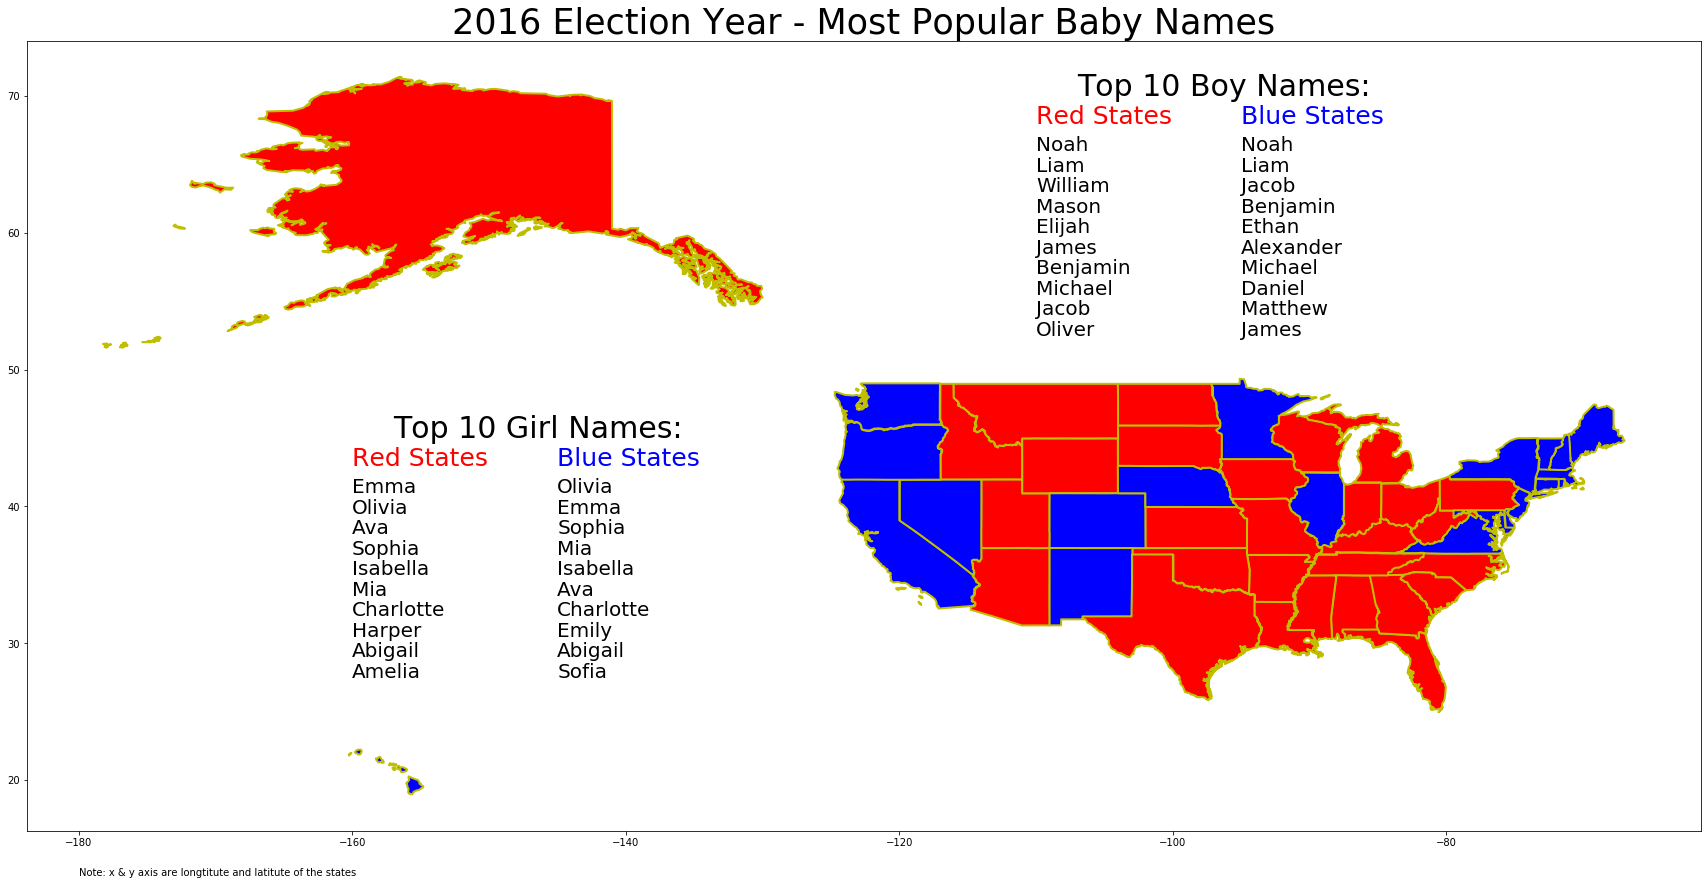

In [12]:
#create a US map by R/D affiliation and show top 10 names
def state_plotter(states, us_map=True):
    fig, ax=plt.subplots(figsize=(30,30))
    if us_map: 
        usa[0:51].plot(ax=ax, alpha=0.3)
        for n in red2016:
            usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='r', edgecolor='y', linewidth=2)
        for n in blue2016:
            usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='b', edgecolor='y', linewidth=2)
    elif us_map==False:
        for n in states:
            usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='b', edgecolor='y', linewidth=2)

state_plotter('red2016','blue2016')

# Give our map a tile and footer
plt.title("2016 Election Year - Most Popular Baby Names", fontsize=35)
plt.text(-180,13,"Note: x & y axis are longtitute and latitute of the states")

# Incorporate a text labels for top names
plt.text(-157,45, "Top 10 Girl Names:", fontsize=30)
plt.text(-160,43, "Red States", fontsize=25,color='red')
plt.text(-145,43, "Blue States", fontsize=25,color='blue')
plt.text(-107,70, "Top 10 Boy Names:", fontsize=30)
plt.text(-110,68, "Red States", fontsize=25,color='red')
plt.text(-95,68, "Blue States", fontsize=25,color='blue')

#loop for girls names
#create lists for names to be loded in the text
y2016RedGirls=topRedNames2016_sorted.loc[topRedNames2016_sorted['gender']=='F','name'].tolist()
y2016BlueGirls=topBlueNames2016_sorted.loc[topBlueNames2016_sorted['gender']=='F','name'].tolist()
#set coordiants for girls lists
yGirls=41
x2016RedGirls=-160
x2016BlueGirls=-145
#create a loop to write the names to the text on the map
for name in y2016RedGirls:
    plt.text(x2016RedGirls, yGirls,name,fontsize=20)
    yGirls=yGirls-1.5
yGirls=41   #reset yGirls for blue loop 
for name in y2016BlueGirls:
    plt.text(x2016BlueGirls, yGirls,name,fontsize=20)
    yGirls=yGirls-1.5
#loop for boy names
#create lists for boy names to be loded in the text
y2016RedBoys=topRedNames2016_sorted.loc[topRedNames2016_sorted['gender']=='M','name'].tolist()
y2016BlueBoys=topBlueNames2016_sorted.loc[topBlueNames2016_sorted['gender']=='M','name'].tolist()
#set coordiants for boys lists
yBoys=66
x2016RedBoys=-110
x2016BlueBoys=-95
#create a loop to write the names to the text on the map
for name in y2016RedBoys:
    plt.text(x2016RedBoys, yBoys,name,fontsize=20)
    yBoys=yBoys-1.5
yBoys=66   #reset yBoys for blue loop 
for name in y2016BlueBoys:
    plt.text(x2016BlueBoys, yBoys,name,fontsize=20)
    yBoys=yBoys-1.5

# Save and show the Figure
plt.savefig("output/2016Top10.png", bbox_inches="tight")
plt.show()


# Combined 2012 Election Results

In [13]:
#combine 2012 Red & Blue State results into one DF to idenity matches and variances in top 10 names
name_2012summary_df=pd.merge(topRedNames2012_sorted,topBlueNames2012_sorted,how='outer', 
                         on=['name','gender'], suffixes=('Red','Blue'))
name_2012summary_df.replace(np.nan, 0, inplace=True)
name_2012summary_df['Red']=np.where(name_2012summary_df['countRed']>0,'R','') #to add a column ideintifying name in the red state
name_2012summary_df['Blue']=np.where(name_2012summary_df['countBlue']>0,'B','') #to add a column identifying name in the blue state
name_2012summary_df['Red_Blue_2012']= name_2012summary_df.Red + name_2012summary_df.Blue #to combine red and blue state columns   
name_2012summary_df.Red_Blue_2012.replace(['RB','R','B'],['R & B', 'R', 'B'],inplace=True) #replace values in Red_Blue column

#to format count columns
pd.options.display.float_format = '{:,.0f}'.format
#finalize presentation of the df
name_2012summary_df.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True) #drop unnecessary columns and show the DF

,gender,name,countRed,countBlue,Red_Blue_2012
0,F,Emma,"8,187","12,758",R & B
1,F,Mia,"3,973","8,050",R & B
2,F,Elizabeth,"4,073",0,R
3,F,Madison,"4,540","6,857",R & B
4,F,Emily,"4,701","8,948",R & B
5,F,Abigail,"4,878","7,822",R & B
6,F,Ava,"5,908","9,625",R & B
7,F,Olivia,"6,139","11,177",R & B
8,F,Chloe,0,"5,718",B
9,F,Isabella,"6,583","12,516",R & B


In [14]:
#write output to csv
#name_2012summary_df.to_csv('output/top10names2012_RedandBlue.csv', index_label="index") 

In [15]:
#create combined election output for female names only
name_2012summary_df_girls=name_2012summary_df.loc[(name_2012summary_df['gender']=='F')] #.reset_index(drop=True)
#to highlight zero's in count columns
def highlight_zero(s):
    is_zero=s==s.min()
    return['background-color:yellow' if v else '' for v in is_zero]
#finalize presentation of the df
name_2012summary_df_girls.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True).style.apply(highlight_zero, subset=['countRed','countBlue']).format({'countRed': '{:,.0f}','countBlue': '{:,.0f}'})

,gender,name,countRed,countBlue,Red_Blue_2012
0,F,Emma,"8,187","12,758",R & B
1,F,Sophia,"7,492","14,821",R & B
2,F,Isabella,"6,583","12,516",R & B
3,F,Olivia,"6,139","11,177",R & B
4,F,Ava,"5,908","9,625",R & B
5,F,Abigail,"4,878","7,822",R & B
6,F,Emily,"4,701","8,948",R & B
7,F,Madison,"4,540","6,857",R & B
8,F,Elizabeth,"4,073",0,R
9,F,Mia,"3,973","8,050",R & B


In [16]:
##create combined election output for male names only
name_2012summary_df_boys=name_2012summary_df.loc[(name_2012summary_df['gender']=='M')] #.reset_index(drop=True)
#to highlight zero's in count columns
def highlight_zero(s):
    is_zero=s==s.min()
    return['background-color:yellow' if v else '' for v in is_zero]
#finalize presentation of the df
name_2012summary_df_boys.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True).style.apply(highlight_zero, subset=['countRed','countBlue']).format({'countRed': '{:,.0f}','countBlue': '{:,.0f}'})

,gender,name,countRed,countBlue,Red_Blue_2012
0,M,William,"7,603",0,R
1,M,Mason,"7,280","11,689",R & B
2,M,Jacob,"6,934","12,140",R & B
3,M,Noah,"6,355","10,998",R & B
4,M,Ethan,"6,323","11,349",R & B
5,M,Liam,"6,022","10,782",R & B
6,M,Elijah,"5,999",0,R
7,M,Aiden,"5,799",0,R
8,M,Jayden,"5,790","10,337",R & B
9,M,James,"5,589",0,R


# Combined 2016 Election Results

In [17]:
#combine 2016 Red & Blue State results into one DF to idenity matches and variances in top 10 names
name_2016summary_df=pd.merge(topRedNames2016_sorted,topBlueNames2016_sorted,how='outer', 
                         on=['name','gender'], suffixes=('Red','Blue'))
name_2016summary_df.replace(np.nan, 0, inplace=True)
name_2016summary_df['Red']=np.where(name_2016summary_df['countRed']>0,'R','') #to add a column ideintifying name in the red state
name_2016summary_df['Blue']=np.where(name_2016summary_df['countBlue']>0,'B','') #to add a column identifying name in the blue state
name_2016summary_df['Red_Blue_2016']= name_2016summary_df.Red + name_2016summary_df.Blue #to combine red and blue state columns   
name_2016summary_df.Red_Blue_2016.replace(['RB','R','B'],['R & B', 'R', 'B'],inplace=True)                                                                      
#to format count columns
pd.options.display.float_format = '{:,.0f}'.format
#finalize presentation of the df
name_2016summary_df.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True)

,gender,name,countRed,countBlue,Red_Blue_2016
0,F,Emma,"11,124","8,372",R & B
1,F,Amelia,"6,226",0,R
2,F,Abigail,"6,433","5,327",R & B
3,F,Harper,"6,899",0,R
4,F,Charlotte,"7,143","5,947",R & B
5,F,Mia,"7,251","7,177",R & B
6,F,Emily,0,"5,384",B
7,F,Isabella,"7,999","6,796",R & B
8,F,Sophia,"8,306","7,822",R & B
9,F,Sofia,0,"4,733",B


In [18]:
#write output to csv
#name_2016summary_df.to_csv('output/top10names2016_RedandBlue.csv', index_label="index") 

In [19]:
#create combined election output for female names only
name_2016summary_df_girls=name_2016summary_df.loc[(name_2016summary_df['gender']=='F')] #.reset_index(drop=True)
#to highlight zero's in count columns
def highlight_zero(s):
    is_zero=s==s.min()
    return['background-color:yellow' if v else '' for v in is_zero]
#finalize presentation of the df
name_2016summary_df_girls.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True).style.apply(highlight_zero, subset=['countRed','countBlue']).format({'countRed': '{:,.0f}','countBlue': '{:,.0f}'})

,gender,name,countRed,countBlue,Red_Blue_2016
0,F,Emma,"11,124","8,372",R & B
1,F,Olivia,"10,784","8,581",R & B
2,F,Ava,"9,852","6,450",R & B
3,F,Sophia,"8,306","7,822",R & B
4,F,Isabella,"7,999","6,796",R & B
5,F,Mia,"7,251","7,177",R & B
6,F,Charlotte,"7,143","5,947",R & B
7,F,Harper,"6,899",0,R
8,F,Abigail,"6,433","5,327",R & B
9,F,Amelia,"6,226",0,R


In [20]:
#create combined election output for male names only
name_2016summary_df_boys=name_2016summary_df.loc[(name_2016summary_df['gender']=='M')] #.reset_index(drop=True)
#to highlight zero's in count columns
def highlight_zero(s):
    is_zero=s==s.min()
    return['background-color:yellow' if v else '' for v in is_zero]
#finalize presentation of the df
name_2016summary_df_boys.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True).style.apply(highlight_zero, subset=['countRed','countBlue']).format({'countRed': '{:,.0f}','countBlue': '{:,.0f}'})

,gender,name,countRed,countBlue,Red_Blue_2016
0,M,Noah,"10,546","8,571",R & B
1,M,Liam,"10,212","8,006",R & B
2,M,William,"9,504",0,R
3,M,Mason,"8,927",0,R
4,M,Elijah,"8,750",0,R
5,M,James,"8,487","6,375",R & B
6,M,Benjamin,"7,728","6,913",R & B
7,M,Michael,"7,578","6,510",R & B
8,M,Jacob,"7,488","7,022",R & B
9,M,Oliver,"7,397",0,R


# Origin and Meaning of the final top names

In [23]:
#df to summarize male names, their origin and meaning

#combine 2016 and 2012 Red & Blue State results into one DF to idenity matches and variances in top 10 names
totalElection_name_summary_df=pd.merge(name_2016summary_df_boys,name_2012summary_df_boys,how='outer', 
                         on=['name','gender'], suffixes=('x','y'))
#drop unnecessary columns and clean up political affiliation columns
totalElection_name_summary_df1=totalElection_name_summary_df.drop(totalElection_name_summary_df.columns[[1,3,4,5,6,7,9,10,11,12,13,14]],axis=1)
totalElection_name_summary_df1.replace(np.nan, 'N/A', inplace=True) 
meaning_origin_summary_df=totalElection_name_summary_df1.rename({'Red_Blue_2016': '2016', 'Red_Blue_2012': '2012'}, axis=1)
meaning_origin_summary_df
#write output to csv
meaning_origin_summary_df.to_csv('output/finalTopMaleNames.csv', index_label="index") 
#import csv summary of final names with meaning and origin
origin_meaning_boys= pd.DataFrame()
origin_meaning_boys = pd.read_csv('data/name_origin_boys.csv',encoding='ISO-8859-1')
origin_meaning_boys

,name,Name Origin,Name Meaning
0,William,Old French/German,resolute protector
1,Mason,English/Old French,one who works with stone
2,Jacob,Greek/Hebrew,supplanted (one who follows)
3,Noah,Hebrew,"rest, response"
4,Ethan,Hebrew (from Eitan/Eytan),"firm, strong and long-lived"
5,Liam,Irish (from William),resolute protector
6,Elijah,Hebrew,Yahweh is God
7,Aiden,Irish,Celtic sun god
8,Jayden,Hebrew,thankful
9,James,Hebrew (from Jacob),supplanted (one who follows)


In [24]:
#df to summarize female names, their origin and meaning

#combine 2016 and 2012 Red & Blue State results into one DF to idenity matches and variances in top 10 names
totalElection_name_summary_df=pd.merge(name_2016summary_df_girls,name_2012summary_df_girls,how='outer', 
                         on=['name','gender'], suffixes=('x','y'))
#drop unnecessary columns and clean up political affiliation columns
totalElection_name_summary_df2=totalElection_name_summary_df.drop(totalElection_name_summary_df.columns[[1,3,4,5,6,7,9,10,11,12,13,14]],axis=1)
totalElection_name_summary_df2.replace(np.nan, 'N/A', inplace=True) 
meaning_origin_Gsummary_df=totalElection_name_summary_df2.rename({'Red_Blue_2016': '2016', 'Red_Blue_2012': '2012'}, axis=1)
meaning_origin_Gsummary_df
#write output to csv
meaning_origin_Gsummary_df.to_csv('output/finalTopFemaleNames.csv', index_label="index") 
#import csv summary of final names with meaning and origin
origin_meaning_girls= pd.DataFrame()
origin_meaning_girls = pd.read_csv('data/name_origin_girls.csv',encoding='ISO-8859-1')
origin_meaning_girls

,gender,name,Name Origin,Name Meaning
0,F,Emma,Germanic/Scandinavian,"whole, universal"
1,F,Olivia,Latin,olive tree
2,F,Ava,Latin,bird
3,F,Sophia,Greek,"wisdom, skill"
4,F,Isabella,Hebrew/ Spanish/ Italian,pledged to God
5,F,Mia,Italian/Scandinavian,mine or bitter
6,F,Charlotte,English/French,free
7,F,Harper,"English, Scottish, Irish",harp
8,F,Abigail,Hebrew,father's joy
9,F,Amelia,Latin,work
